In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline 
import seaborn as sns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

In [2]:
bucket = 'global-merchant-fraud-detector'
prefix = 'Datasets'
s3 = boto3.client('s3')

train = (pd.read_csv(s3.get_object(Bucket=bucket, Key=f'{prefix}/train_df.csv')['Body']))
test = (pd.read_csv(s3.get_object(Bucket=bucket, Key=f'{prefix}/test_df.csv')['Body']))

In [4]:
print("train rows and columns:",train.shape)
print("test rows and columns:",test.shape)

train rows and columns: (180803, 76)
test rows and columns: (49372, 76)


In [5]:
#df['merchant_id'] = df['merchant_id'].astype('object')
#df['country_id'] = df['country_id'].astype('object')
#df['sign_up_time']= pd.to_datetime(df['sign_up_time'])
import datetime as dt
train['sign_up_time'] = pd.to_datetime(train['sign_up_time'])
train['sign_up_time']=train['sign_up_time'].map(dt.datetime.toordinal)

test['sign_up_time'] = pd.to_datetime(test['sign_up_time'])
test['sign_up_time']=test['sign_up_time'].map(dt.datetime.toordinal)

In [6]:
# Check data quality
def quality_report(df):
 
    """
    Description: Displays quality of data in terms of missing values, unique numbers, datatypes etc.
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total', 'Percent','Nunique', 'Dtype'])
    display(quality_df)

In [7]:
print(quality_report(train))

,Total,Percent,Nunique,Dtype
login_count_24h,138051,76.354375,55,float64
bank_changed,187,0.103427,32,float64
age_merchant,24,0.013274,80,float64
login_count,1,0.000553,3621,float64
chb_amount_72h,0,0.000000,192,float64
tx_amount_suc_72h,0,0.000000,39970,float64
tx_amount_suc_ever,0,0.000000,147933,float64
tx_count_suc_24h,0,0.000000,169,int64
tx_count_suc_72h,0,0.000000,279,int64
tx_count_suc_ever,0,0.000000,4702,int64


None


In [8]:
print(quality_report(test))

,Total,Percent,Nunique,Dtype
login_count_24h,38938,78.866564,44,float64
bank_changed,28,0.056712,20,float64
age_merchant,6,0.012153,78,float64
chb_amount_72h,0,0.000000,298,float64
tx_amount_suc_72h,0,0.000000,18050,float64
tx_amount_suc_ever,0,0.000000,42523,float64
tx_count_suc_24h,0,0.000000,104,int64
tx_count_suc_72h,0,0.000000,182,int64
tx_count_suc_ever,0,0.000000,2850,int64
chb_amount_24h,0,0.000000,190,float64


None


# Train and Test Datasets

In [9]:
# Separting the input data and target variables

X_train = train.iloc[:, :-1]
y_train = train['target_fraud']

X_test = test.iloc[:, :-1]
y_test = test['target_fraud']

In [10]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (180803, 75)
X_test (49372, 75)
y_train (180803,)
y_test (49372,)


# Transformation

In [13]:
# Create dictionary
cleanup_nums = {"frequency":     {"daily": 0, "weekly": 1, "monthly":2}}
# Apply back to df
X_train = X_train.replace(cleanup_nums)

In [14]:
cat_vars = ['verification_type','currency','mcc_name','payment_instrument']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(X_train[var], prefix=var)
    data = X_train.join(cat_list)
    X_train = data
cat_vars = ['verification_type','currency','mcc_name','payment_instrument']
data_vars = X_train.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [15]:
X_train=X_train[to_keep]
X_train.columns.values

array(['merchant_id', 'sign_up_time', 'months_using_sumup',
       'age_merchant', 'country_id', 'moto_enabled_flag', 'bank_changed',
       'total_card_paid', 'frequency', 'login_count', 'login_count_24h',
       'tx_amount_failed_24h', 'tx_amount_failed_72h',
       'tx_amount_failed_ever', 'tx_count_failed_24h',
       'tx_count_failed_72h', 'tx_count_failed_ever', 'tx_amount_suc_24h',
       'tx_amount_suc_72h', 'tx_amount_suc_ever', 'tx_count_suc_24h',
       'tx_count_suc_72h', 'tx_count_suc_ever', 'chb_amount_24h',
       'chb_amount_72h', 'chb_amount_ever', 'chb_count_24h',
       'chb_count_72h', 'chb_count_ever', 'tx_amount_suc_24h_cnp',
       'tx_amount_suc_72h_cnp', 'tx_amount_suc_ever_cnp',
       'tx_amount_suc_24h_cp', 'tx_amount_suc_72h_cp',
       'tx_amount_suc_ever_cp', 'tx_count_suc_24h_cnp',
       'tx_count_suc_72h_cnp', 'tx_count_suc_ever_cnp',
       'tx_count_suc_24h_cp', 'tx_count_suc_72h_cp',
       'tx_count_suc_ever_cp', 'tx_amount_failed_24h_cnp',
       

In [16]:
print(quality_report(X_train))

,Total,Percent,Nunique,Dtype
login_count_24h,138051,76.354375,55,float64
bank_changed,187,0.103427,32,float64
age_merchant,24,0.013274,80,float64
login_count,1,0.000553,3621,float64
tx_count_failed_72h_cnp,0,0.000000,54,int64
tx_count_failed_24h_cnp,0,0.000000,44,int64
tx_amount_night,0,0.000000,72005,float64
tx_count_night,0,0.000000,1915,int64
tx_amount_failed_ever_cp,0,0.000000,119440,float64
tx_amount_failed_72h_cp,0,0.000000,22087,float64


None


In [18]:
X_test = X_test.replace(cleanup_nums)

In [19]:
cat_vars=['verification_type','currency','mcc_name','payment_instrument']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(X_test[var], prefix=var)
    data2=X_test.join(cat_list)
    X_test=data2
cat_vars=['verification_type','currency','mcc_name','payment_instrument']
data_vars2=X_test.columns.values.tolist()
to_keep=[i for i in data_vars2 if i not in cat_vars]

In [20]:
X_test=X_test[to_keep]
X_test.columns.values

array(['merchant_id', 'sign_up_time', 'months_using_sumup',
       'age_merchant', 'country_id', 'moto_enabled_flag', 'bank_changed',
       'total_card_paid', 'frequency', 'login_count', 'login_count_24h',
       'tx_amount_failed_24h', 'tx_amount_failed_72h',
       'tx_amount_failed_ever', 'tx_count_failed_24h',
       'tx_count_failed_72h', 'tx_count_failed_ever', 'tx_amount_suc_24h',
       'tx_amount_suc_72h', 'tx_amount_suc_ever', 'tx_count_suc_24h',
       'tx_count_suc_72h', 'tx_count_suc_ever', 'chb_amount_24h',
       'chb_amount_72h', 'chb_amount_ever', 'chb_count_24h',
       'chb_count_72h', 'chb_count_ever', 'tx_amount_suc_24h_cnp',
       'tx_amount_suc_72h_cnp', 'tx_amount_suc_ever_cnp',
       'tx_amount_suc_24h_cp', 'tx_amount_suc_72h_cp',
       'tx_amount_suc_ever_cp', 'tx_count_suc_24h_cnp',
       'tx_count_suc_72h_cnp', 'tx_count_suc_ever_cnp',
       'tx_count_suc_24h_cp', 'tx_count_suc_72h_cp',
       'tx_count_suc_ever_cp', 'tx_amount_failed_24h_cnp',
       

In [21]:
print(quality_report(X_test))

,Total,Percent,Nunique,Dtype
login_count_24h,38938,78.866564,44,float64
bank_changed,28,0.056712,20,float64
age_merchant,6,0.012153,78,float64
payment_instrument_bank card,0,0.000000,1,uint8
tx_count_failed_24h_cnp,0,0.000000,53,int64
tx_amount_night,0,0.000000,25164,float64
tx_count_night,0,0.000000,1016,int64
tx_amount_failed_ever_cp,0,0.000000,35229,float64
tx_amount_failed_72h_cp,0,0.000000,7511,float64
tx_amount_failed_24h_cp,0,0.000000,5968,float64


None


In [22]:
list(X_train.columns)

['merchant_id',
 'sign_up_time',
 'months_using_sumup',
 'age_merchant',
 'country_id',
 'moto_enabled_flag',
 'bank_changed',
 'total_card_paid',
 'frequency',
 'login_count',
 'login_count_24h',
 'tx_amount_failed_24h',
 'tx_amount_failed_72h',
 'tx_amount_failed_ever',
 'tx_count_failed_24h',
 'tx_count_failed_72h',
 'tx_count_failed_ever',
 'tx_amount_suc_24h',
 'tx_amount_suc_72h',
 'tx_amount_suc_ever',
 'tx_count_suc_24h',
 'tx_count_suc_72h',
 'tx_count_suc_ever',
 'chb_amount_24h',
 'chb_amount_72h',
 'chb_amount_ever',
 'chb_count_24h',
 'chb_count_72h',
 'chb_count_ever',
 'tx_amount_suc_24h_cnp',
 'tx_amount_suc_72h_cnp',
 'tx_amount_suc_ever_cnp',
 'tx_amount_suc_24h_cp',
 'tx_amount_suc_72h_cp',
 'tx_amount_suc_ever_cp',
 'tx_count_suc_24h_cnp',
 'tx_count_suc_72h_cnp',
 'tx_count_suc_ever_cnp',
 'tx_count_suc_24h_cp',
 'tx_count_suc_72h_cp',
 'tx_count_suc_ever_cp',
 'tx_amount_failed_24h_cnp',
 'tx_amount_failed_72h_cnp',
 'tx_amount_failed_ever_cnp',
 'tx_amount_failed

# Model - XG-Boost

In [24]:
!pip install xgboost

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached xgboost-1.4.2-py3-none-manylinux2010_x86_64.whl (166.7 MB)
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [25]:
from xgboost import XGBClassifier

#model = XGBClassifier(objective = "binary:logistic", random_state = 123)
model = XGBClassifier(random_state = 123)

In [26]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:26:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

# Feature Importance

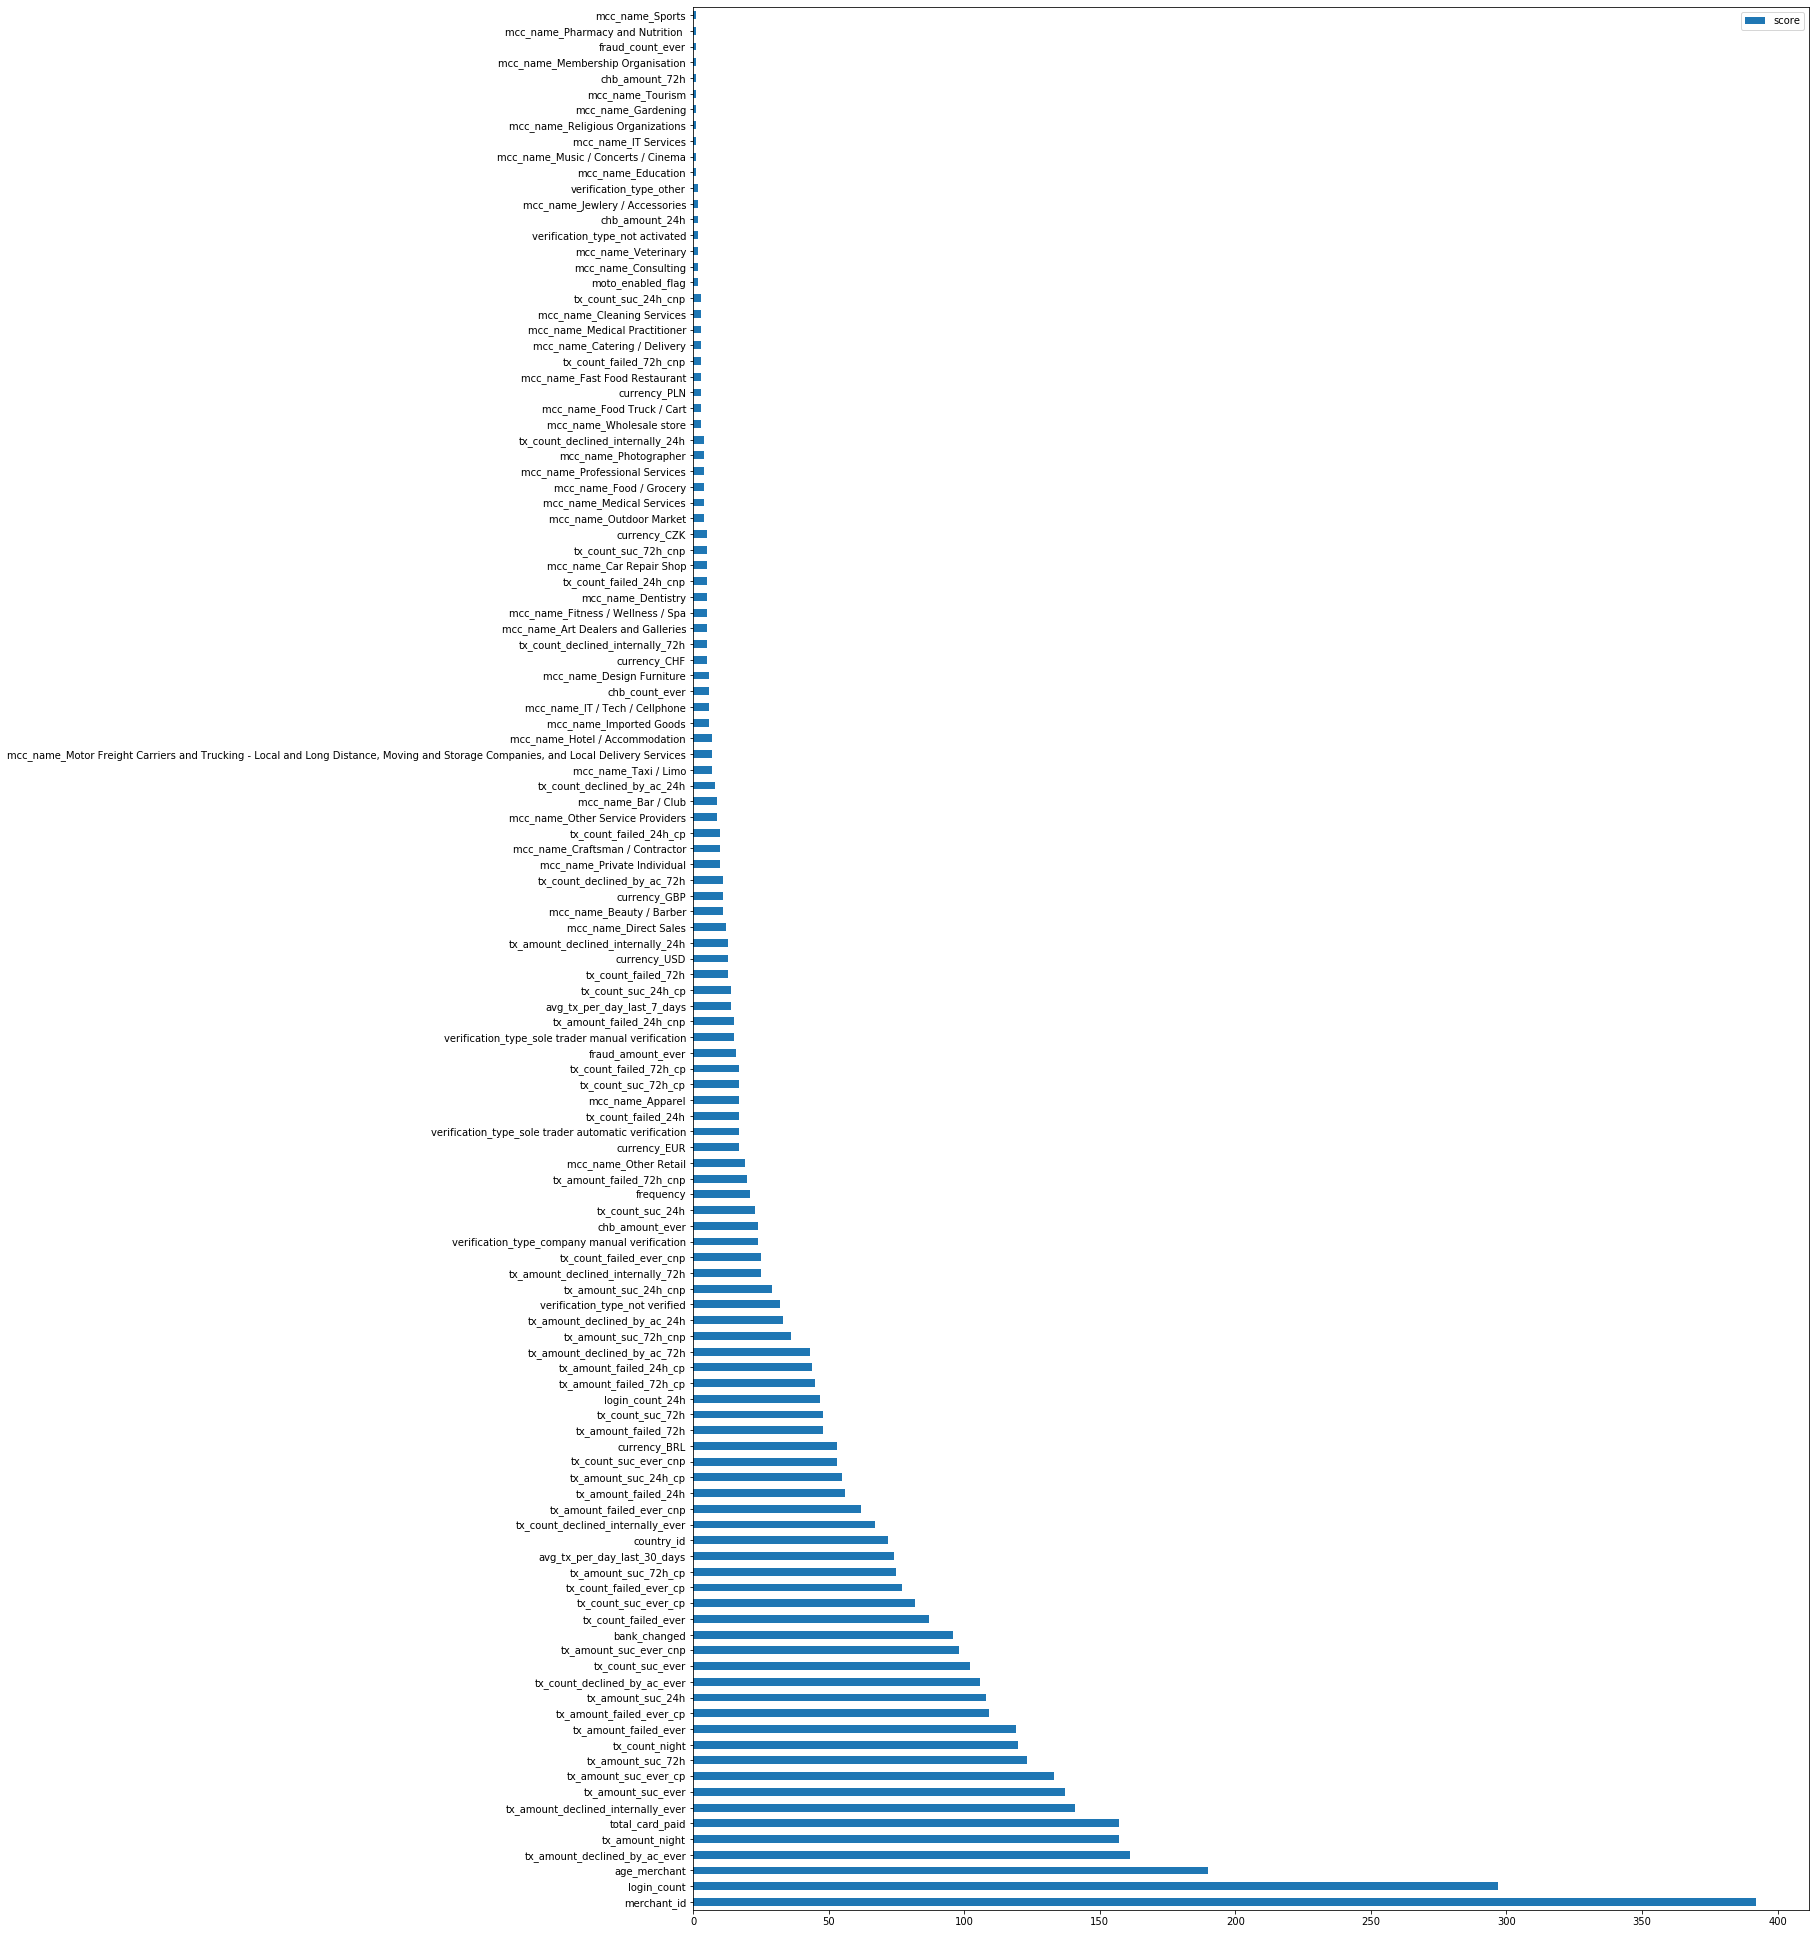

In [30]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh', figsize=(20,35))

In [ ]:
plt.barh(X_train.feature_names, model.feature_importances_)

In [21]:
# make predictions for test data
y_pred = model.predict_proba(X_test)[:, 1]

In [22]:
print(model.classes_)

[0 1]


In [23]:
y_pred

array([4.0371434e-04, 2.2062045e-04, 1.6900299e-03, ..., 6.5165013e-01,
       6.7712045e-01, 9.7901630e-01], dtype=float32)

In [24]:
y_prob = pd.DataFrame(y_pred, columns=['probability'])
y_prob

,probability
0,0.000404
1,0.000221
2,0.001690
3,0.003075
4,0.001260
...,...
49367,0.973058
49368,0.295062
49369,0.651650
49370,0.677120


In [25]:
print("output min prob", min(y_prob.probability))
print("output max prob",max(y_prob.probability))

output min prob 8.934488505474292e-06
output max prob 0.999993085861206


In [26]:
y_list = y_test.values
y_df = pd.DataFrame()
y_df['target_fraud'] = y_list.tolist()
y_df

,target_fraud
0,0
1,0
2,0
3,0
4,0
...,...
49367,1
49368,1
49369,1
49370,1


In [27]:
pred_df = pd.concat([y_df,y_prob], axis=1)
pred_df5 = pred_df
pred_df5['predicted_label'] = np.where((pred_df.probability>=0.50), 1, 0)
pred_df5

,target_fraud,probability,predicted_label
0,0,0.000404,0
1,0,0.000221,0
2,0,0.001690,0
3,0,0.003075,0
4,0,0.001260,0
...,...,...,...
49367,1,0.973058,1
49368,1,0.295062,0
49369,1,0.651650,1
49370,1,0.677120,1


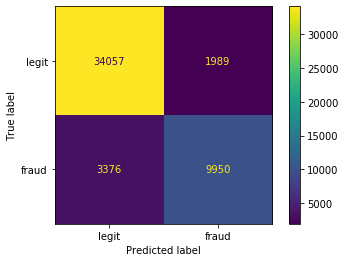

In [28]:
y_true5 = pred_df5['target_fraud']
y_pred5 = pred_df5['predicted_label']

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true5, y_pred5)
cmd = ConfusionMatrixDisplay(cm, display_labels=['legit','fraud'])
cmd.plot(values_format='d')

In [32]:
tp = 9950
fp = 1989
tn = 34057
fn = 3376
accuracy = (tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (precision * recall) / (precision + recall)

print("accuracy:", accuracy)
print("recall:", recall)
print("precision:", precision)
print("f1 score:", f1)

accuracy: 0.8913351697318318
recall: 0.7466606633648507
precision: 0.8334031325906692
f1 score: 0.7876509004551752


# Threshold 0.6

In [29]:
thres6 = pred_df5.drop(['predicted_label'], axis=1)
thres6['predicted_label'] = np.where((thres6.probability>=0.6), 1, 0)
thres6

,target_fraud,probability,predicted_label
0,0,0.000404,0
1,0,0.000221,0
2,0,0.001690,0
3,0,0.003075,0
4,0,0.001260,0
...,...,...,...
49367,1,0.973058,1
49368,1,0.295062,0
49369,1,0.651650,1
49370,1,0.677120,1


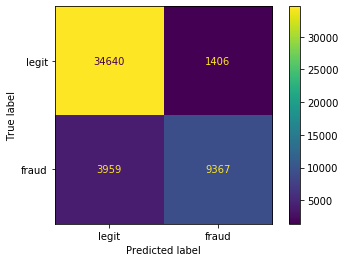

In [30]:
y_true6 = thres6['target_fraud']
y_pred6 = thres6['predicted_label']

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm4 = confusion_matrix(y_true6, y_pred6)
cmd4 = ConfusionMatrixDisplay(cm4, display_labels=['legit','fraud'])
cmd4.plot(values_format='d')

In [33]:
tp = 9367
fp = 1406
tn = 34640
fn = 3959
accuracy = (tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (precision * recall) / (precision + recall)

print("accuracy:", accuracy)
print("recall:", recall)
print("precision:", precision)
print("f1 score:", f1)

accuracy: 0.8913351697318318
recall: 0.7029116013807594
precision: 0.8694885361552028
f1 score: 0.7773766546329722


# Threshold 0.7

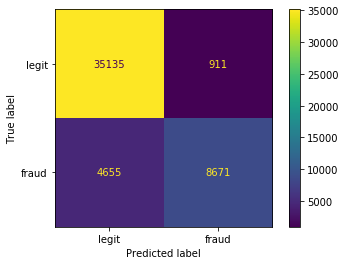

In [34]:
thres7 = pred_df5.drop(['predicted_label'], axis=1)
thres7['predicted_label'] = np.where((thres7.probability>=0.7), 1, 0)

y_true7 = thres7['target_fraud']
y_pred7 = thres7['predicted_label']

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm7 = confusion_matrix(y_true7, y_pred7)
cmd7 = ConfusionMatrixDisplay(cm7, display_labels=['legit','fraud'])
cmd7.plot(values_format='d')

In [35]:
tp = 8671
fp = 911
tn = 35135
fn = 4655
accuracy = (tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (precision * recall) / (precision + recall)

print("accuracy:", accuracy)
print("recall:", recall)
print("precision:", precision)
print("f1 score:", f1)

accuracy: 0.8872640362958762
recall: 0.6506828755815699
precision: 0.9049259027342935
f1 score: 0.7570281124497992


# Threshold 0.8

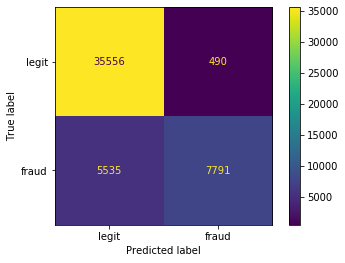

In [32]:
thres8 = pred_df5.drop(['predicted_label'], axis=1)
thres8['predicted_label'] = np.where((thres8.probability>=0.8), 1, 0)

y_true8 = thres8['target_fraud']
y_pred8 = thres8['predicted_label']

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm8 = confusion_matrix(y_true8, y_pred8)
cmd8 = ConfusionMatrixDisplay(cm8, display_labels=['legit','fraud'])
cmd8.plot(values_format='d')

In [33]:
tp = 7791
fp = 490
tn = 35556
fn = 5535
accuracy = (tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (precision * recall) / (precision + recall)

print("accuracy:", accuracy)
print("recall:", recall)
print("precision:", precision)
print("f1 score:", f1)

accuracy: 0.8779672688973508
recall: 0.5846465556055831
precision: 0.9408284023668639
f1 score: 0.7211551811912805
